# Principal Stresses and Axes

This notebook computes the principal stresses and principal directions (rotation matrix) of a given symmetric stress tensor.

**How to use:**
1. Run the cell below to define the function.
2. Modify `sigma` as needed and run the execution cells to see the results.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [33]:
# Input: your tensor (MPa) - you are welcome to modify but keep symmetrical
sigma = np.array([[350.000,   86.603,  173.205],
                  [ 86.603,  450.000, -100.000],
                  [173.205, -100.000,  300.000]])

print("User-defined stress tensor (MPa):\n", sigma)

User-defined stress tensor (MPa):
 [[ 350.      86.603  173.205]
 [  86.603  450.    -100.   ]
 [ 173.205 -100.     300.   ]]


In [34]:
# Perform eigen-decomposition
w, V = np.linalg.eigh(sigma)   # w eigenvalues in ascending order, V has eigenvectors as columns

# Sort the eigenvalues and eigenvectors so σ₁ ≥ σ₂ ≥ σ₃
idx = np.argsort(w)[::-1]      # indices that result in descending eigenvalues
w = w[idx]                     # reorder eigenvalues
V = V[:, idx]                  # reorder eigenvectors accordingly

print("\nPrincipal stresses (MPa):", w)


Principal stresses (MPa): [500. 500. 100.]


In [35]:
# Rotation matrix: transposition do that rows of Q [eigenvectors] are principal directions in the original basis
Q = V.T

# Ensure that the rotation matrix is right-handed (i.e. the coordinate system purely rotates without deformation)
if np.linalg.det(Q) < 0:
    Q[-1, :] *= -1

print("\nRotation matrix Q:\n", Q)


Rotation matrix Q:
 [[ 0.607  0.783  0.134]
 [ 0.506 -0.512  0.694]
 [ 0.612 -0.354 -0.707]]


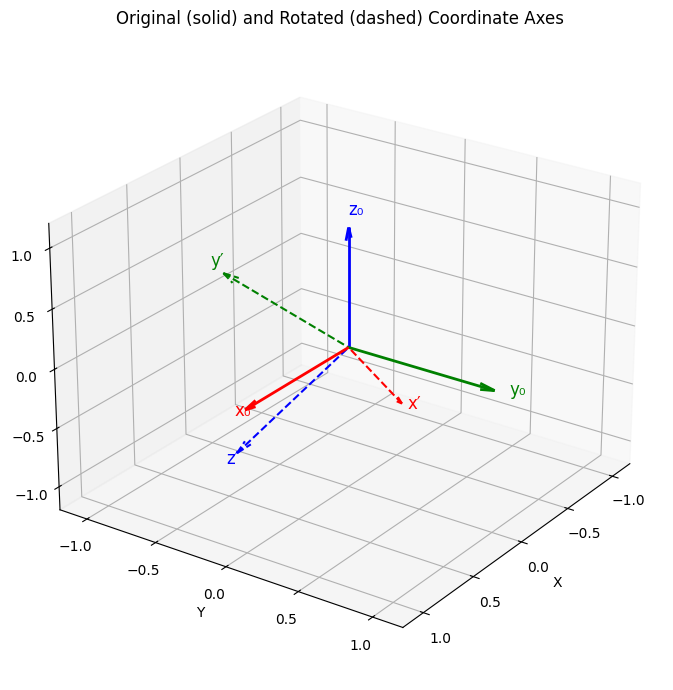

In [36]:
# --- Plot original and rotated coordinate axes ---
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = np.zeros((3, 1))

# Original coordinate axes (unit vectors)
axes_orig = np.eye(3)

# Rotated coordinate axes (columns of Q^T for passive rotation)
axes_rot = Q.T  # Each column is a rotated axis in the original system

# Define colors and labels
colors = ['r', 'g', 'b']
labels = ['x', 'y', 'z']

# Plot original axes
for i in range(3):
    ax.quiver(*origin.flatten(), *axes_orig[:, i], color=colors[i], length=1, arrow_length_ratio=0.1, linewidth=2)
    ax.text(*(1.1*axes_orig[:, i]), f'{labels[i]}₀', color=colors[i], fontsize=12)

# Plot rotated axes
for i in range(3):
    ax.quiver(*origin.flatten(), *axes_rot[:, i], color=colors[i], linestyle='dashed', length=1, arrow_length_ratio=0.1)
    ax.text(*(1.1*axes_rot[:, i]), f'{labels[i]}′', color=colors[i], fontsize=12)

# Formatting
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Original (solid) and Rotated (dashed) Coordinate Axes")

ax.view_init(elev=25, azim=35)
ax.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Stress tensor in the new base by multiplication with the rotation matrix
sig_p_diag = Q @ sigma @ Q.T

print("\nDiagonalized stress tensor (MPa):\n", sig_p_diag)


Diagonalized stress tensor (MPa):
 [[500.   0.   0.]
 [ -0. 500.  -0.]
 [  0.  -0. 100.]]
